In [30]:
from data_utils.prepare_data import load_images
from autoencoders.VQ_VAE.VQ_VAE import VQ_VAE,VQ_VAE2
from trainers.autoencoder_trainer import VQVAE_Trainer
from yaml import safe_load
import argparse
import torch
import numpy as np
import matplotlib.pyplot as plt

In [31]:
config = safe_load(open("./configs/default_all_bound96.yaml"))
train_dataloader, validation_dataloader, test_dataloader = load_images(
        config['img_size'], 
        config['validation_ratio'], 
        config['test_ratio'], 
        config['batch_size'],
        'FFHQ'
    )


In [32]:
vqvae_config = config['VQ-VAE']
if 'version' in vqvae_config.keys() and vqvae_config['version'] == 2:
    vqvae = VQ_VAE2(
        3, 
        vqvae_config['latent_dimension'], 
        vqvae_config['kernel_sizes'], 
        vqvae_config['res_layers'], 
        vqvae_config['code_book_size'],
        vqvae_config['lower_bound_factor']
    )
else:
    vqvae_config['version'] = 1
    vqvae = VQ_VAE(
        3, 
        vqvae_config['latent_dimension'], 
        vqvae_config['kernel_sizes'], 
        vqvae_config['res_layers'], 
        vqvae_config['code_book_size']
    )
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vqvae_config['device'] = device

In [34]:
checkpoint = torch.load('./results/best_model_exp18.pth', map_location=device)
vqvae.load_state_dict(checkpoint)
vqvae = vqvae.to(device)

RuntimeError: Attempting to deserialize object on CUDA device 2 but torch.cuda.device_count() is 1. Please use torch.load with map_location to map your storages to an existing device.

In [16]:
test_image = next(iter(train_dataloader))[:16]
vqvae.eval()


In [27]:
rec_images,_ = vqvae(test_image.to(device))

In [17]:
def map_to_correct_coordinates(image):
    return (image + 1) / 2

In [28]:
test_image_5 = test_image[:5]
rec_images_5 = rec_images[:5].detach().cpu().numpy()

In [19]:
ids = vqvae.encode_to_id(test_image_5.to(device))
ids[0][0]

tensor([[236, 265, 423,  ...,  59, 423, 236],
        [265,   5,  45,  ..., 371, 371, 371],
        [265,  45, 137,  ..., 170, 306, 510],
        ...,
        [103, 211, 309,  ..., 334, 134,  18],
        [103,   4, 285,  ..., 376, 432, 497],
        [511, 386, 473,  ..., 234, 189, 310]], device='cuda:0')

In [20]:
rec_from_code = vqvae.decode_from_id(*ids).detach().cpu().numpy()

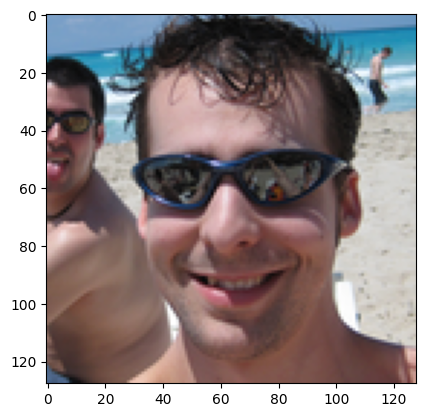

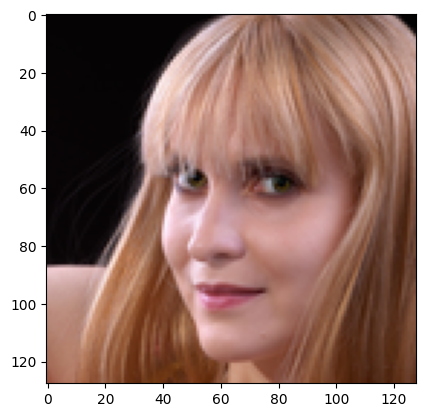

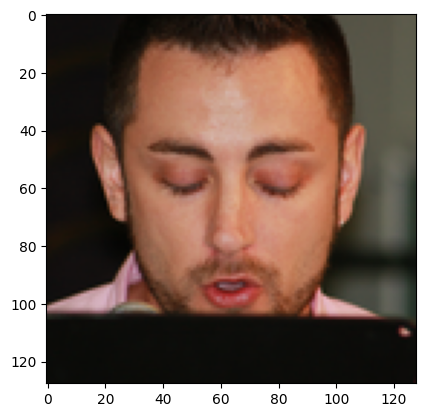

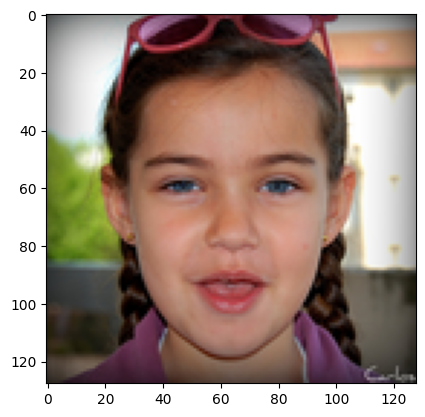

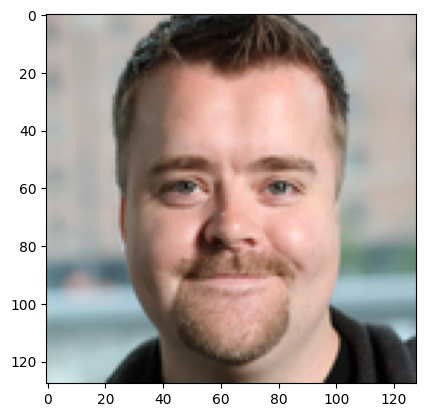

In [21]:
for img in test_image_5:
    img_rearranged = map_to_correct_coordinates(np.transpose(img, (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


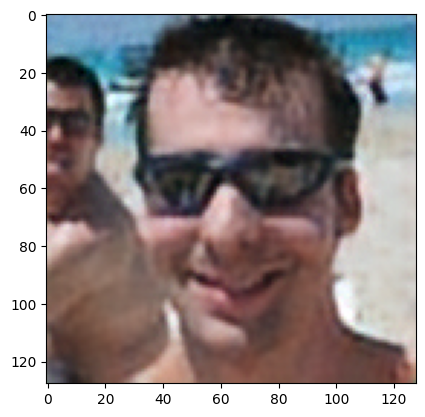

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


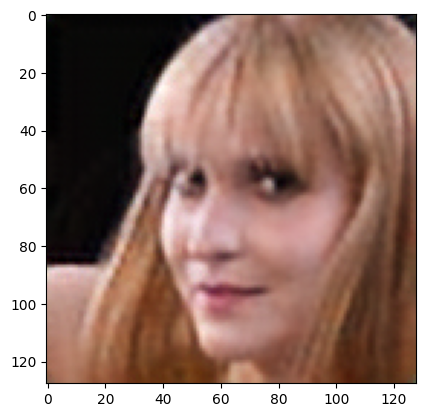

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


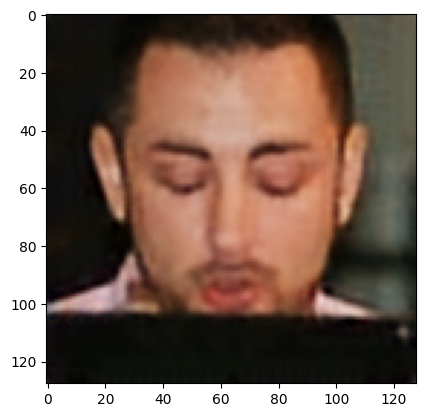

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


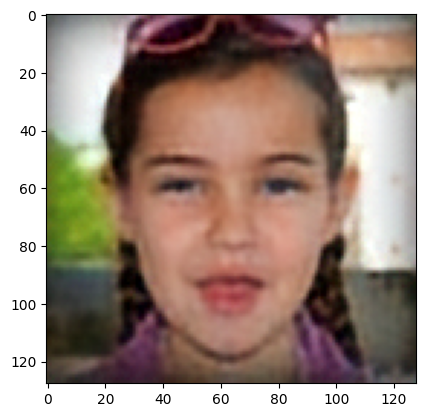

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


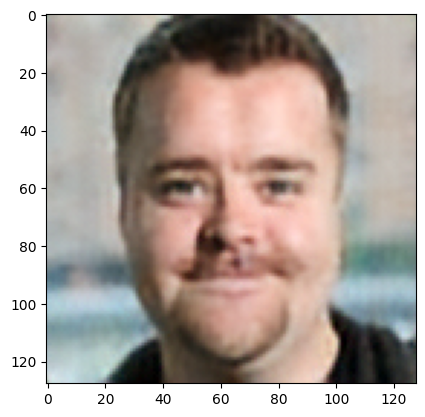

In [29]:
for img in rec_images_5:
    img_rearranged = map_to_correct_coordinates(np.transpose(np.array(img), (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


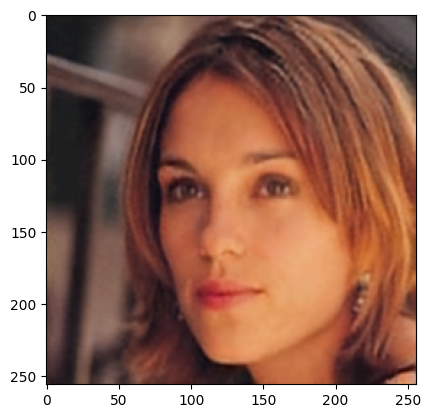

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


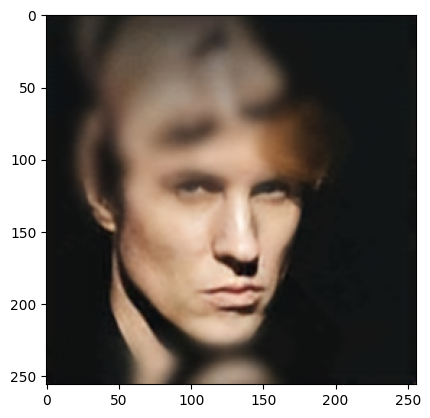

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


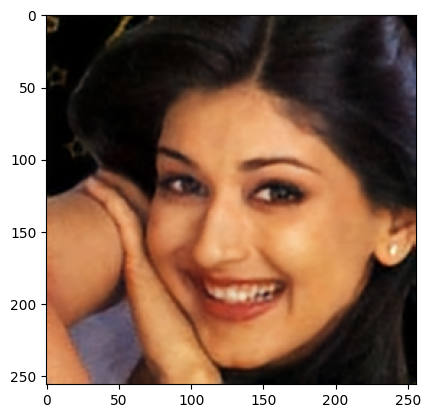

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


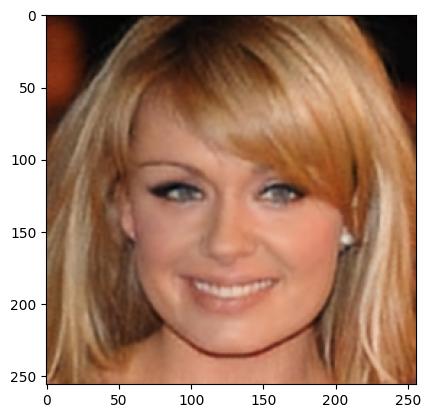

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


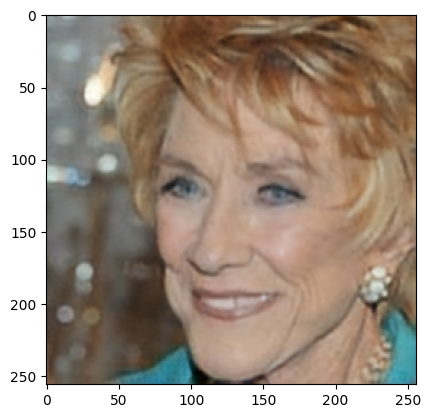

In [12]:
for img in rec_from_code:
    img_rearranged = map_to_correct_coordinates(np.transpose(np.array(img), (1, 2, 0)))
    plt.imshow(img_rearranged)
    plt.show()

In [4]:
codes_top = np.load('t_codes.npy').flatten()
codes_bottom = np.load('b_codes.npy').flatten()

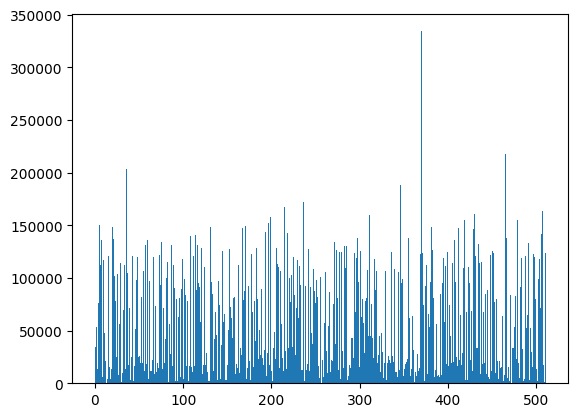

In [5]:
plt.hist(codes_top, bins=range(512))
plt.show()

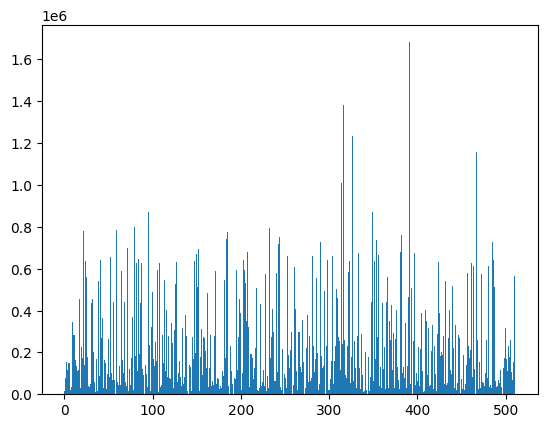

In [6]:
plt.hist(codes_bottom, bins=range(512))
plt.show()